## **Import required libraries**

In [3]:
# Importing necessary libraries for data manipulation, visualization, and plotting

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Load the Dataset**

In [4]:
# Loading the dataset from a CSV file into a pandas DataFrame

spam_df=pd.read_csv('../data/emails.csv')

## **More about dataset**

In [5]:
# Displaying the entire dataset

spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
# Displaying the first 10 rows of the dataset
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [7]:
# Displaying the last 10 rows of the dataset
spam_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [8]:
# Generating descriptive statistics for the dataset
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
# Displaying information about the dataset, including data types and non-null counts
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## **Visualize the Data**


In [10]:
# Filtering the dataset to separate non-spam (ham) emails
ham=spam_df[spam_df['spam']==0]

In [11]:
# Filtering the dataset to separate spam emails
spam=spam_df[spam_df['spam']==1]

In [12]:
# Displaying the filtered non-spam (ham) emails
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
# Displaying the filtered spam emails
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [14]:
# Calculating and printing the percentage of spam emails in the dataset
print('Spam Percentage =',(len(spam)/len(spam_df))*100,'%') 

Spam Percentage = 23.88268156424581 %


In [15]:
# Calculating and printing the percentage of non-spam (ham) emails in the dataset
print('Ham Percentage =',(len(ham)/len(spam_df))*100,'%')

Ham Percentage = 76.11731843575419 %


C:\Users\vishwaraj khatpe\AppData\Local\Temp\ipykernel_11812\1043171553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=spam_df, palette='viridis')


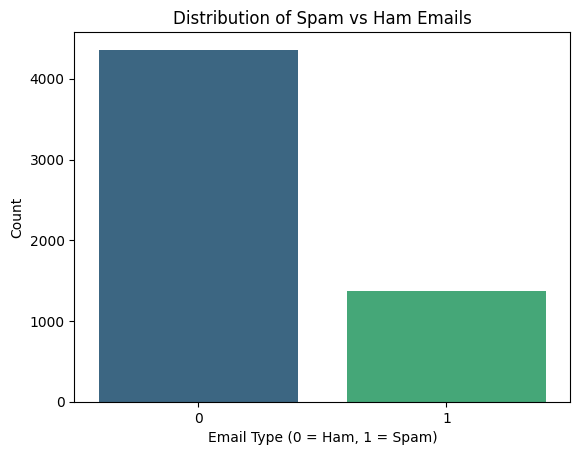

In [16]:
# Visualizing the distribution of spam and ham emails using a count plot
sns.countplot(x='spam', data=spam_df, palette='viridis')
plt.title('Distribution of Spam vs Ham Emails')
plt.xlabel('Email Type (0 = Ham, 1 = Spam)')
plt.ylabel('Count')
plt.show()

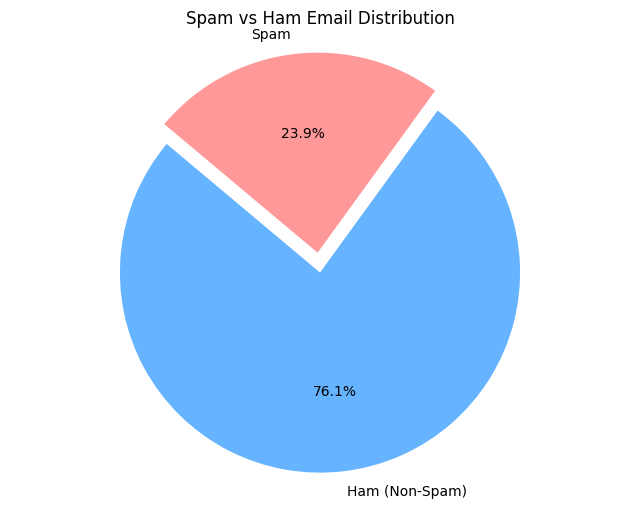

In [17]:
# Visualizing the distribution of spam and ham emails using a pie chart
labels = ['Ham (Non-Spam)', 'Spam']
sizes = [len(ham), len(spam)]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode the first slice (Ham)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Spam vs Ham Email Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

## **Applying CountVectorizer**

In [18]:
# Importing CountVectorizer to convert text data into numerical features
from sklearn.feature_extraction.text import CountVectorizer

# Initializing the CountVectorizer and transforming the text data into a sparse matrix
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(spam_df['text'])

In [19]:
# Displaying the feature names (words) extracted by CountVectorizer
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'],
      shape=(37303,), dtype=object)

In [20]:
# Displaying the shape of the sparse matrix (number of rows and columns)
spamham_countVectorizer.shape

(5728, 37303)

## **Dividing the Cell for Training and Testing Prior to Training**

In [21]:
# Assigning the target variable (spam column) to 'label' and features to 'X'
label=spam_df['spam']
X=spamham_countVectorizer
y=label

In [22]:
# Displaying the shape of the feature matrix
X.shape

(5728, 37303)

In [23]:
# Displaying the shape of the target variable
y.shape

(5728,)

## **Model Training**

In [24]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
# Importing the Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

In [26]:
# Initializing and training the Multinomial Naive Bayes classifier
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

## **Evaluating The Model**

In [27]:
# Importing metrics for evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
# Predicting the training set results
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 1, ..., 1, 0, 0], shape=(4582,))

In [29]:
# Generating the confusion matrix for the training set
cm=confusion_matrix(y_train,y_predict_train) 

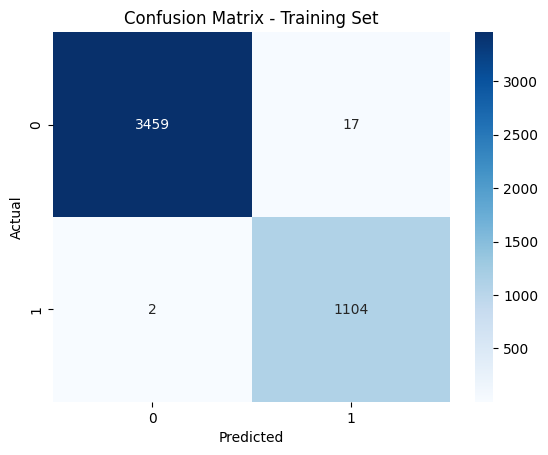

In [30]:
# Visualizing the confusion matrix for the training set as a heatmap
cm_train = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

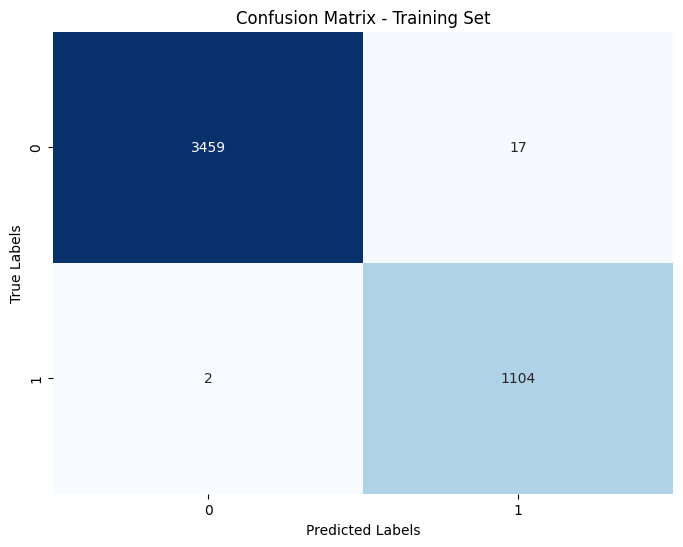

In [31]:
# Visualizing the confusion matrix for the training set as a heatmap
cm_train = confusion_matrix(y_train, y_predict_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [32]:
# Predicting the testing set results
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

array([0, 1, 0, ..., 0, 0, 1], shape=(1146,))

In [33]:
# Generating the confusion matrix for the testing set
cm=confusion_matrix(y_test,y_predict_test) # confusion matrix


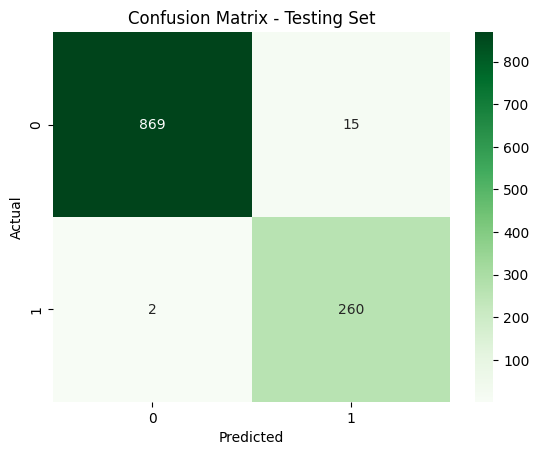

In [34]:
# Visualizing the confusion matrix for the testing set as a heatmap
cm_test = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

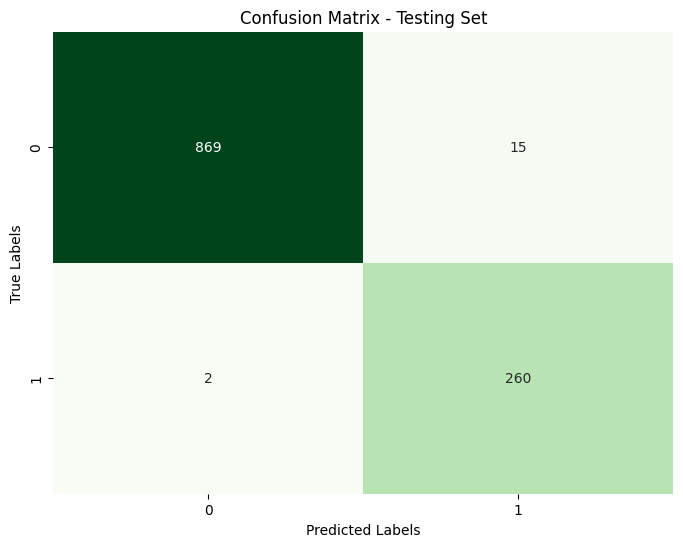

In [35]:
# Visualizing the confusion matrix for the testing set as a heatmap
cm_test = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [36]:
# Printing the classification report for the testing set
print(classification_report(y_test,y_predict_test)) # classification report

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       884
           1       0.95      0.99      0.97       262

    accuracy                           0.99      1146
   macro avg       0.97      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



# **Testing Model with Real Data**

In [54]:
# Ensure the model and vectorizer are already trained and loaded before this block

# Adding an input field to test the model on real data
test_email = input("hello")

# Transforming the input text using the preloaded CountVectorizer
test_email_vectorized = vectorizer.transform([test_email])

# Predicting the class (0 = Ham, 1 = Spam)
prediction = NB_classifier.predict(test_email_vectorized)

# Displaying the result
if prediction[0] == 1:
    print("The email is classified as: Spam")
else:
    print("The email is classified as: Ham")

The email is classified as: Ham
